In [1]:
## Have a slice from Andrew Schaeffer's Tomography model which we can use for sanity checking

%matplotlib inline

import numpy as np


In [2]:
# Grab the raw data, save in compressed / binary form

# SL2013_150 = np.loadtxt("SL2013sv_0150.txt")
# np.savez_compressed("SL2013sv_0150.npz", tomo150km=SL2013_150, description="Lon, Lat, dVS, VSref")

In [3]:
data = np.load("SL2013sv_0150.npz")
print data["description"]
SL2013_150 = data["tomo150km"]

dVs = SL2013_150[:,2].reshape(361, 721)
Vs  = SL2013_150[:,3].reshape(361, 721)

dVratio = dVs / Vs * 100.0 

## Data are at 0.5 degree samples, so reshape to 721 x 361 


Lon, Lat, dVS, VSref


In [6]:
## Grab the same information for Litho1  (I don't have the reference model so I'll use Andrew's)

import litho1pt0 as litho

# model = litho.property_at_location

lon = SL2013_150[:,0].reshape(361, 721)
lat = SL2013_150[:,1].reshape(361, 721)
depth = np.ones_like(lon) * 130.0

c, lVs = litho.property_at_location(  lat, lon, depth, "VS")
c, lVp = litho.property_at_location(  lat, lon, depth, "VP")

ldVs = lVs - Vs
ldVratio = ldVs / Vs * 100.0

In [10]:
# For plotting, I want to compare the 150km lid depth contour with the tomography

lonv, latv = np.meshgrid(np.linspace(-180,180,720), np.linspace(-89,89,356), sparse=False, indexing='xy')

l1 = litho.layer_depth(latv, lonv, "LID-BOTTOM")
l2 = litho.layer_depth(latv, lonv, "LID-TOP")

lthickness = (l1 - l2)*0.001
lab_depth = l1*0.001

In [11]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

global_extent     = [-180.0, 180.0, -89, 89]

projection1 = ccrs.Orthographic(central_longitude=140.0, central_latitude=0.0, globe=None)
projection2 = ccrs.Mollweide()
projection3 = ccrs.Robinson()

base_projection = ccrs.PlateCarree()

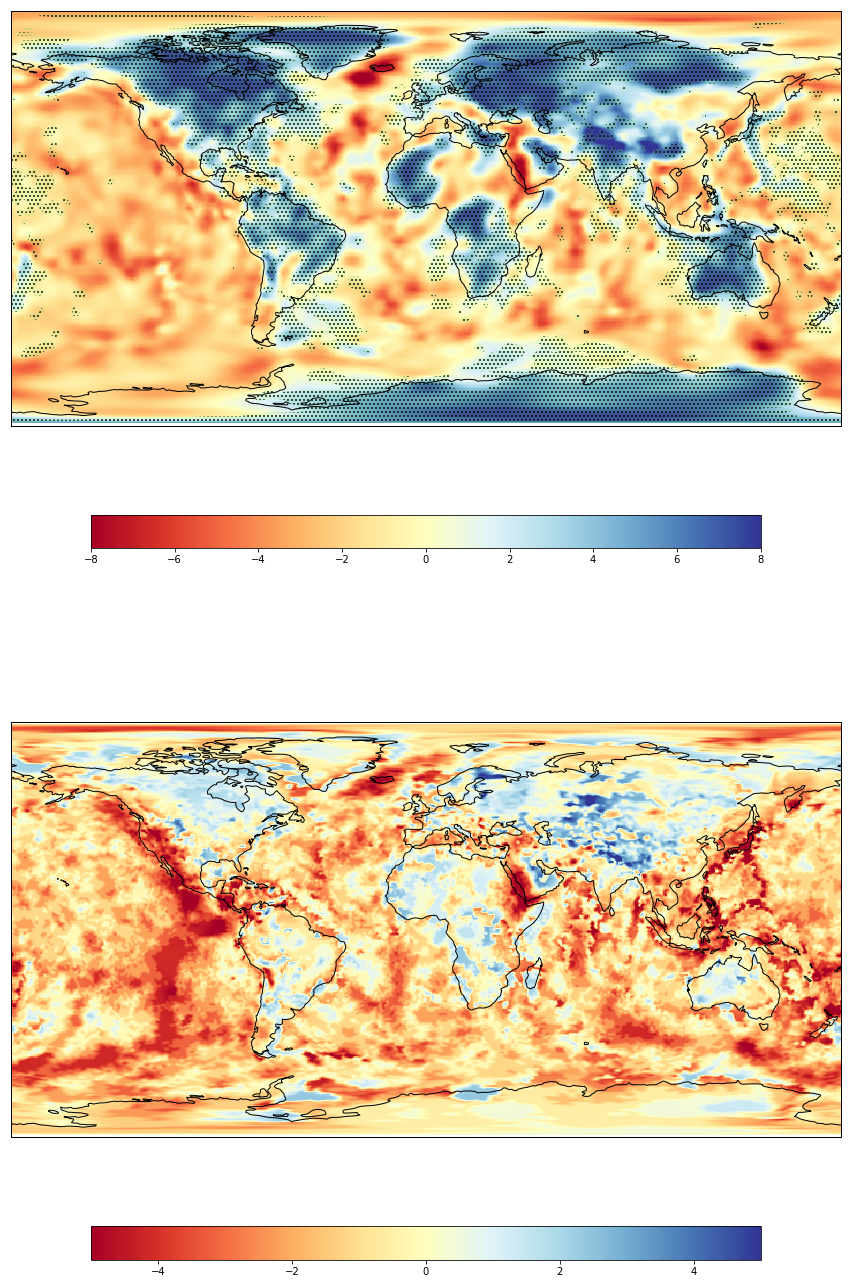

In [12]:
fig = plt.figure(figsize=(24, 24), facecolor="none")
ax  = plt.subplot(211, projection=ccrs.PlateCarree())
ax2 = plt.subplot(212, projection=ccrs.PlateCarree())


ax.coastlines()
ax2.coastlines()

ax.set_global()
ax2.set_global()


m = ax.imshow(dVratio, origin='lower', transform=base_projection,
          extent=global_extent, zorder=0, cmap="RdYlBu", vmin=-8, vmax=8)

ax.contourf(lab_depth, origin='lower', levels=[130, 400], hatches=["...",], 
                 extent=global_extent, transform=base_projection, colors=[(0.5,0.95,0.5,0.15),])


m2 = ax2.imshow(ldVratio, origin='lower', transform=base_projection,
          extent=global_extent, zorder=0, cmap="RdYlBu", vmin=-5, vmax=5)

plt.colorbar(mappable=m, orientation="horizontal", shrink=0.5, ax=ax)
plt.colorbar(mappable=m2, orientation="horizontal", shrink=0.5, ax=ax2)


fig.savefig("CompareAS.png", dpi=300)
